# **Project Name**    "Detecting Card Fraud: A Machine Learning Approach with Regression Models"



##### **Project Type**    - Fraud Detection Using PCA and Regression Models  
##### **Contribution**    - Individual  
##### **Name**    - Mazen Asag  


### **Introduction**

Fraud detection is a major challenge in financial sectors, especially given the increasing volume of transactions and the growing sophistication of fraudulent activities. The problem is complicated further by the **class imbalance** in transaction data, where fraudulent transactions make up a small fraction of the total data. In this project, we aim to address this issue by using **Principal Component Analysis (PCA)** and various **regression models** to detect fraudulent transactions.

We will apply **PCA** to reduce the dimensionality of the dataset, ensuring privacy while also improving the performance of the models. By balancing the dataset using **undersampling** and **oversampling** techniques, we hope to enhance the model’s ability to detect fraudulent transactions without sacrificing the identification of legitimate ones.

The project evaluates several machine learning models, such as **Logistic Regression**, **Random Forest**, and **Decision Trees**, to assess which model performs best on this imbalanced dataset, using metrics like **accuracy**, **precision**, **recall**, and **F1 score**.

---

### **Dataset Description**

The dataset used in this project consists of **284,807 rows** and **31 features**, representing anonymized transaction data. It is highly imbalanced, with a vast majority of legitimate transactions (Class 0) and a very small number of fraudulent transactions (Class 1).

- **Features**: The dataset contains **31 features** that include anonymized details about the transactions such as transaction amount, timestamp, and user ID.
- **Target Variable**: The target variable is binary:
  - `0` represents a legitimate transaction
  - `1` represents a fraudulent transaction
- **Imbalance**: The dataset is imbalanced, with the majority of the transactions being legitimate (Class 0) and only a small fraction being fraudulent (Class 1). This imbalance presents a challenge for training machine learning models effectively.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [42]:
df=pd.read_csv('/content/creditcard.csv')

In [43]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [44]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [45]:
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [47]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [48]:
null=df.isnull().sum()

In [49]:
null.to_frame().T

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
df['Amount']

,Amount
0,149.62
1,2.69
2,378.66
3,123.50
4,69.99
...,...
284802,0.77
284803,24.79
284804,67.88
284805,10.00


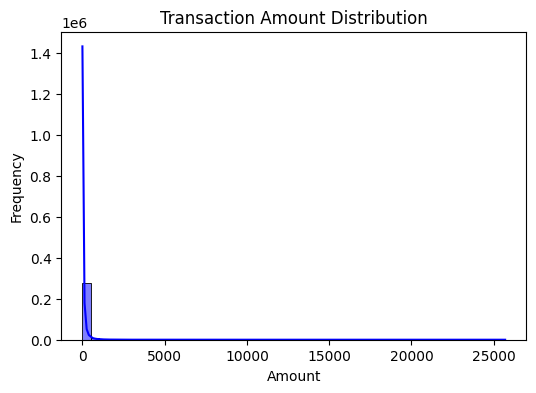

In [51]:
# Distribution of the 'Amount' feature
plt.figure(figsize=(6, 4))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


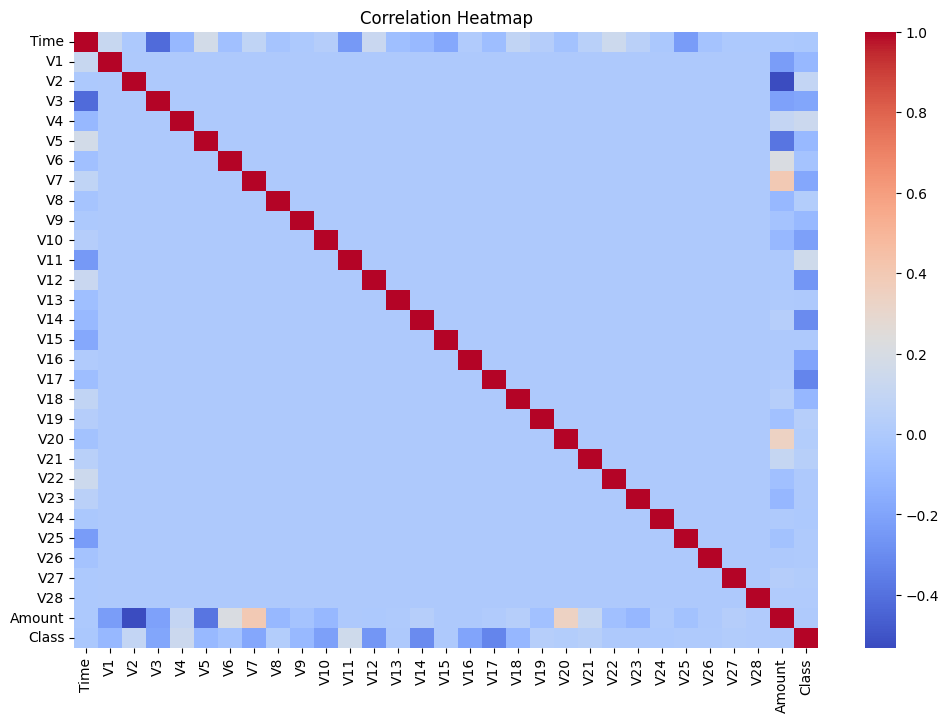

In [52]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title("Correlation Heatmap")
plt.show()

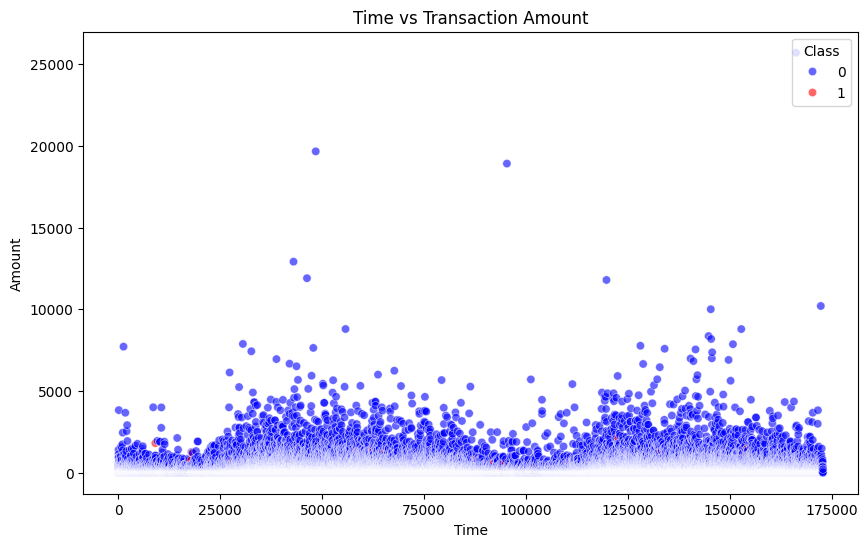

In [53]:
# Scatter plot: Time vs Amount, colored by Class
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.title("Time vs Transaction Amount")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend(title="Class", loc='upper right')
plt.show()


In [55]:
sc=StandardScaler()

df['Amount']=sc.fit_transform(pd.DataFrame(df['Amount']))


In [56]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [57]:
df=df.drop(['Time'],axis=1)

In [58]:
df.shape

(284807, 30)

In [59]:
df.duplicated().sum()

9144

In [60]:
df=df.drop_duplicates()

In [61]:
df.duplicated().sum()

0

###Check for Data Balanece


In [62]:
df['Class'].value_counts()

,count
Class,
0,275190
1,473


### Class Distribution  
- **Class 0**: 275,190 (Majority class - Legitimate transactions)  
- **Class 1**: 473 (Minority class - Fraudulent transactions)  

### Challenges Due to Class Imbalance  
1. **Bias Toward the Majority Class**  
   - The model might predict all transactions as legitimate (Class 0) to achieve high accuracy, ignoring fraudulent cases (Class 1).  

2. **Difficulty in Learning Patterns**  
   - With so few examples of Class 1, the model may struggle to learn the nuances of fraudulent transactions.  

### Impact on Machine Learning Models  
- Imbalanced data can lead to suboptimal performance, requiring specialized techniques to handle the imbalance effectively.  


<ipython-input-64-2840d9f75490>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Class'], palette='coolwarm', edgecolor='black')


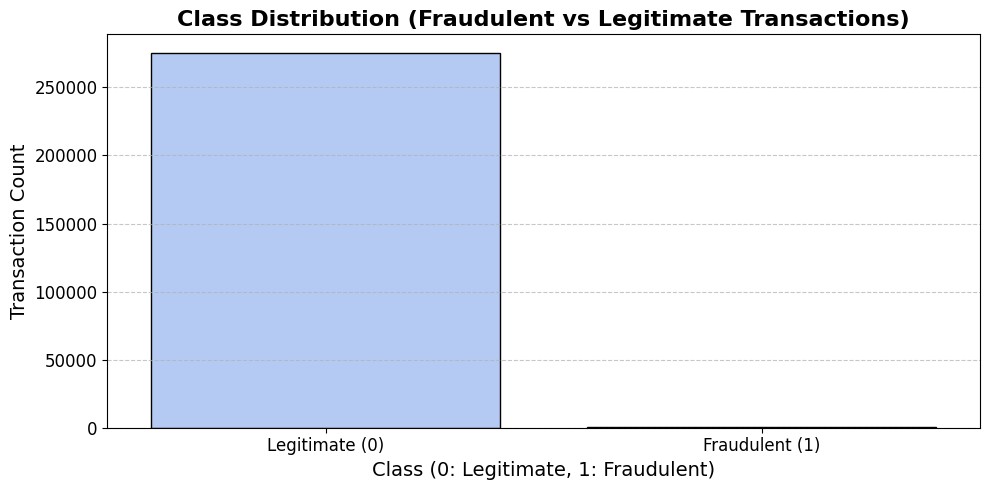

In [64]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Class'], palette='coolwarm', edgecolor='black')

# Title and Labels
plt.title('Class Distribution (Fraudulent vs Legitimate Transactions)', fontsize=16, fontweight='bold')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)

# Customize ticks
plt.xticks(ticks=[0, 1], labels=['Legitimate (0)', 'Fraudulent (1)'], fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


### Analyzing Class Distribution and Model Performance

Looking at the class distribution, we can clearly see that the dataset is highly imbalanced — with the majority of transactions being legitimate (Class 0) and only a small fraction being fraudulent (Class 1). This imbalance could lead to issues during model training, such as the model being biased toward predicting the majority class.

Let's proceed by running a regression model on this imbalanced dataset first and observe the results. After that, we'll implement techniques to balance the dataset, such as oversampling the minority class or undersampling the majority class, and then we'll compare the performance to see if the balance improves the model’s ability to detect fraudulent transactions.


In [68]:
X=df.drop('Class',axis=1)
y=df['Class']

In [69]:
X_train ,X_test ,y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)

### Model Selection and Evaluation Metrics

We will use several classifiers for this analysis, including:

- **Logistic Regression**: A simple linear model often used for binary classification.
- **Random Forest Classifier**: An ensemble method that combines multiple decision trees for better accuracy and robustness.
- **Decision Tree Classifier**: A model that splits the data into branches based on feature values to make predictions.

For evaluation, we will use the following metrics:

- **Accuracy**: The overall percentage of correct predictions.
- **F1 Score**: The harmonic mean of precision and recall, useful for imbalanced datasets.
- **Precision**: The proportion of true positive predictions among all positive predictions.
- **Recall**: The proportion of true positives among all actual positives.


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score , precision_score , recall_score

In [73]:
classifier = {
    "Logisitic Regression":LogisticRegression(),
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier()

}
for name , cls in classifier.items():
  print(f"--------------------{name}--------------------")
  cls=cls.fit(X_train, y_train)
  y_pred=cls.predict(X_test)
  print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")
  print(f"f1_score  : {f1_score(y_test,y_pred)}")
  print(f"precision Score : {precision_score(y_test,y_pred)}")
  print(f"recall score  : {recall_score(y_id test,y_pred)}")

--------------------Logisitic Regression--------------------
Accuracy Score : 0.9992563437505668
f1_score  : 0.7354838709677419
precision Score : 0.890625
recall score  : 0.6263736263736264
--------------------Random Forest Classifier--------------------
Accuracy Score : 0.9994377233235993
f1_score  : 0.8121212121212121
precision Score : 0.9054054054054054
recall score  : 0.7362637362637363
--------------------Decision Tree Classifier--------------------
Accuracy Score : 0.9989479984764116
f1_score  : 0.7010309278350515
precision Score : 0.6601941747572816
recall score  : 0.7472527472527473


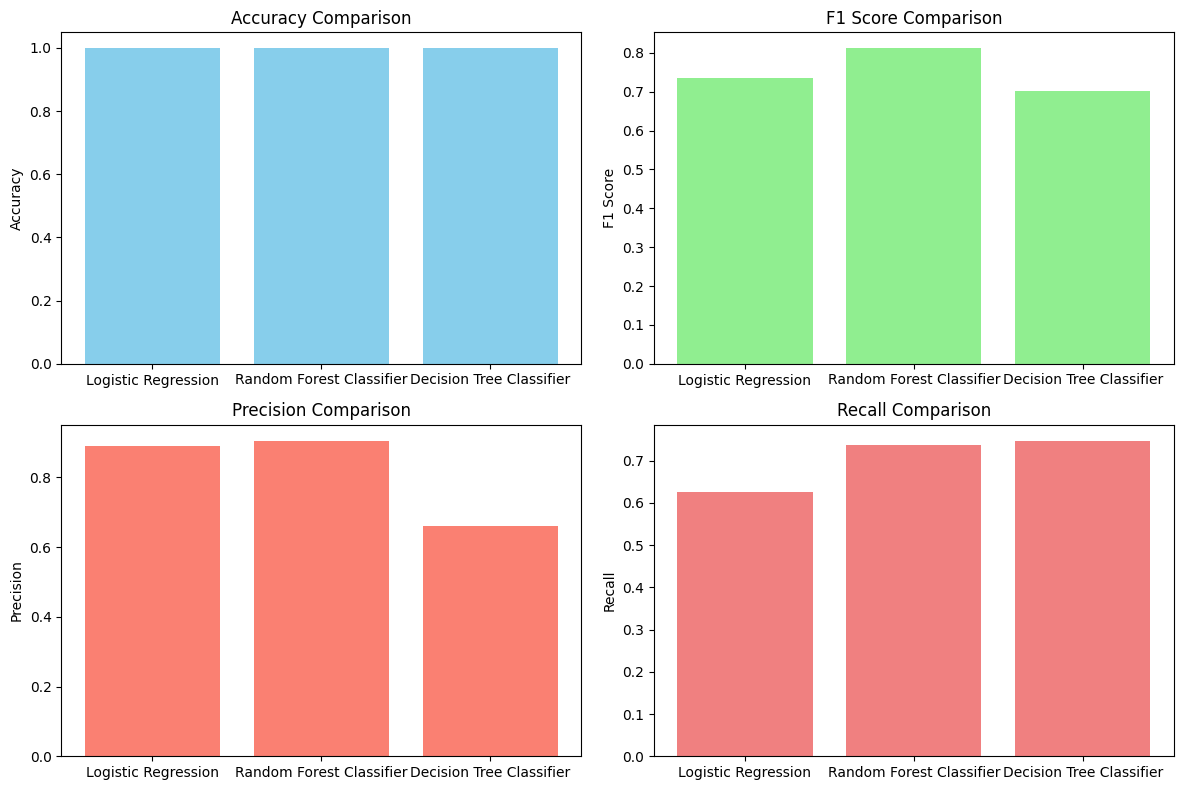

In [74]:
import matplotlib.pyplot as plt

# Predefined performance metrics
classifiers = ["Logistic Regression", "Random Forest Classifier", "Decision Tree Classifier"]
accuracy = [0.9992563437505668, 0.9994377233235993, 0.9989479984764116]
f1 = [0.7354838709677419, 0.8121212121212121, 0.7010309278350515]
precision = [0.890625, 0.9054054054054054, 0.6601941747572816]
recall = [0.6263736263736264, 0.7362637362637363, 0.7472527472527473]

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot Accuracy
plt.subplot(2, 2, 1)
plt.bar(classifiers, accuracy, color='skyblue')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

# Plot F1 Score
plt.subplot(2, 2, 2)
plt.bar(classifiers, f1, color='lightgreen')
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')

# Plot Precision
plt.subplot(2, 2, 3)
plt.bar(classifiers, precision, color='salmon')
plt.title('Precision Comparison')
plt.ylabel('Precision')

# Plot Recall
plt.subplot(2, 2, 4)
plt.bar(classifiers, recall, color='lightcoral')
plt.title('Recall Comparison')
plt.ylabel('Recall')

# Display the plots
plt.tight_layout()
plt.show()


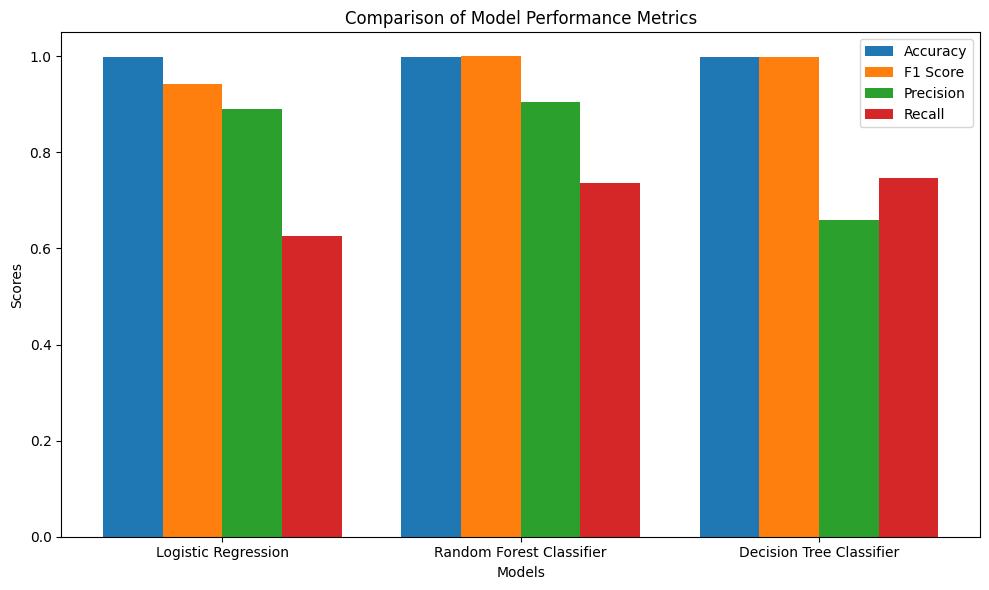

In [117]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier']
accuracy = [0.9992563437505668, 0.9994377233235993, 0.9989479984764116]
f1 = [0.7354838709677419, 0.8121212121212121, 0.7010309278350515]
precision = [0.890625, 0.9054054054054054, 0.6601941747572816]
recall = [0.6263736263736264, 0.7362637362637363, 0.7472527472527473]


# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = range(len(models))

ax.bar(index, accuracy, bar_width, label='Accuracy')
ax.bar([i + bar_width for i in index], f1_score, bar_width, label='F1 Score')
ax.bar([i + 2 * bar_width for i in index], precision, bar_width, label='Precision')
ax.bar([i + 3 * bar_width for i in index], recall, bar_width, label='Recall')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


### Model Analysis and Performance

#### Accuracy:
- The models show high accuracy, but this is misleading due to the imbalanced data. The model can predict the majority class (legitimate transactions) most of the time and still achieve high accuracy.

#### Precision:
- **Random Forest (0.905)** has the best precision, indicating it accurately predicts fraud when it classifies a transaction as fraudulent.
- **Decision Tree (0.660)** has the lowest precision, misclassifying many legitimate transactions as fraud.

#### Recall:
- **Decision Tree (0.747)** has the highest recall, identifying more fraudulent transactions but with lower precision.
- **Logistic Regression (0.626)** misses many frauds, leading to a lower recall.

#### F1 Score:
- **Random Forest** leads with the highest F1 score (0.812), balancing precision and recall well.
- **Logistic Regression** and **Decision Tree** have lower F1 scores, reflecting imbalances between precision and recall.

### Conclusion

- **Imbalanced Data**: High accuracy is not a true indicator of performance due to the imbalance. Models tend to predict the majority class (legitimate transactions) more frequently.
- **Best Model**: Random Forest offers the best balance of precision, recall, and F1 score for fraud detection.
- **Next Steps**: Balancing the dataset and tuning the models will likely improve fraud detection performance, especially for recall and precision.


**Balancing the Dataset**: Since the dataset is imbalanced, applying techniques like SMOTE (Synthetic Minority Oversampling Technique) or undersampling the majority class can help the models better identify fraudulent transactions.

###Undersampling

In [75]:
normal=df[df['Class']==0]
fraud=df[df['Class']==1]

In [77]:
normal.shape

(275190, 30)

In [78]:
fraud.shape

(473, 30)

In [79]:
normal_sample=normal.sample(n=473)

In [80]:
new_data=pd.concat([normal_sample,fraud],ignore_index=True)

In [81]:
new_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.139064,0.280223,0.411497,0.975619,-0.171304,-0.381221,0.076211,0.108493,-0.233669,0.136683,1.658042,0.544523,-1.312273,0.944783,0.576999,0.030166,-0.244235,-0.566630,-0.241131,-0.248513,-0.391248,-1.239423,0.283285,0.118540,0.084887,-0.851189,0.017220,0.015213,-0.338436,0
1,1.028924,0.401267,0.120271,2.485888,0.003738,-0.628603,0.498094,-0.110928,-1.187052,0.900420,1.179498,0.110100,-1.136588,0.942487,-0.390789,0.522535,-0.594929,0.064755,-0.690895,-0.074462,0.083236,-0.033714,-0.144473,0.523678,0.612254,0.033565,-0.063751,0.012754,-0.046056,0
2,0.914196,-1.740600,-0.157507,-1.498038,-1.411701,-0.476343,-0.411436,-0.121405,0.817520,-0.400979,-1.583721,-0.417217,-0.772919,0.118674,1.175344,-1.919320,0.005650,1.853855,0.184895,-0.027519,-0.266689,-0.711598,-0.355144,-0.493204,0.552918,-0.647070,0.042140,0.068134,0.751962,0
3,-2.955659,2.303209,0.502865,-1.805634,-0.969753,-0.629331,-0.112250,0.862374,1.532948,1.902432,1.286864,-0.219286,-2.392848,0.300845,0.394495,0.457587,-0.379360,-0.190819,-1.062334,0.819092,-0.268676,-0.257015,0.117129,0.160140,-0.146623,0.710239,0.517444,0.068045,-0.347072,0
4,0.550221,-0.399114,-0.267267,1.477326,-0.120851,-0.131585,0.423485,-0.012989,-0.448935,-0.499187,2.045507,1.142049,0.658590,-0.798248,0.639379,0.555979,0.463605,0.390141,-0.782448,0.534672,0.127009,-0.253321,-0.275516,-0.078664,0.313903,-0.469665,-0.001158,0.094806,0.865187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [85]:
new_data['Class'].value_counts()

,count
Class,
0,473
1,473


In [103]:
X=new_data.drop('Class',axis=1)
y=new_data['Class']

In [89]:
classifier = {
    "Logisitic Regression":LogisticRegression(),
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier()

}
for name , cls in classifier.items():
  print(f"--------------------{name}--------------------")
  cls=cls.fit(X_train, y_train)
  y_pred=cls.predict(X_test)
  print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")
  print(f"f1_score  : {f1_score(y_test,y_pred)}")
  print(f"precision Score : {precision_score(y_test,y_pred)}")
  print(f"recall score  : {recall_score(y_test,y_pred)}")

--------------------Logisitic Regression--------------------
Accuracy Score : 0.9473684210526315
f1_score  : 0.9489795918367347
precision Score : 0.9893617021276596
recall score  : 0.9117647058823529
--------------------Random Forest Classifier--------------------
Accuracy Score : 0.9473684210526315
f1_score  : 0.9489795918367347
precision Score : 0.9893617021276596
recall score  : 0.9117647058823529
--------------------Decision Tree Classifier--------------------
Accuracy Score : 0.9315789473684211
f1_score  : 0.9353233830845771
precision Score : 0.9494949494949495
recall score  : 0.9215686274509803


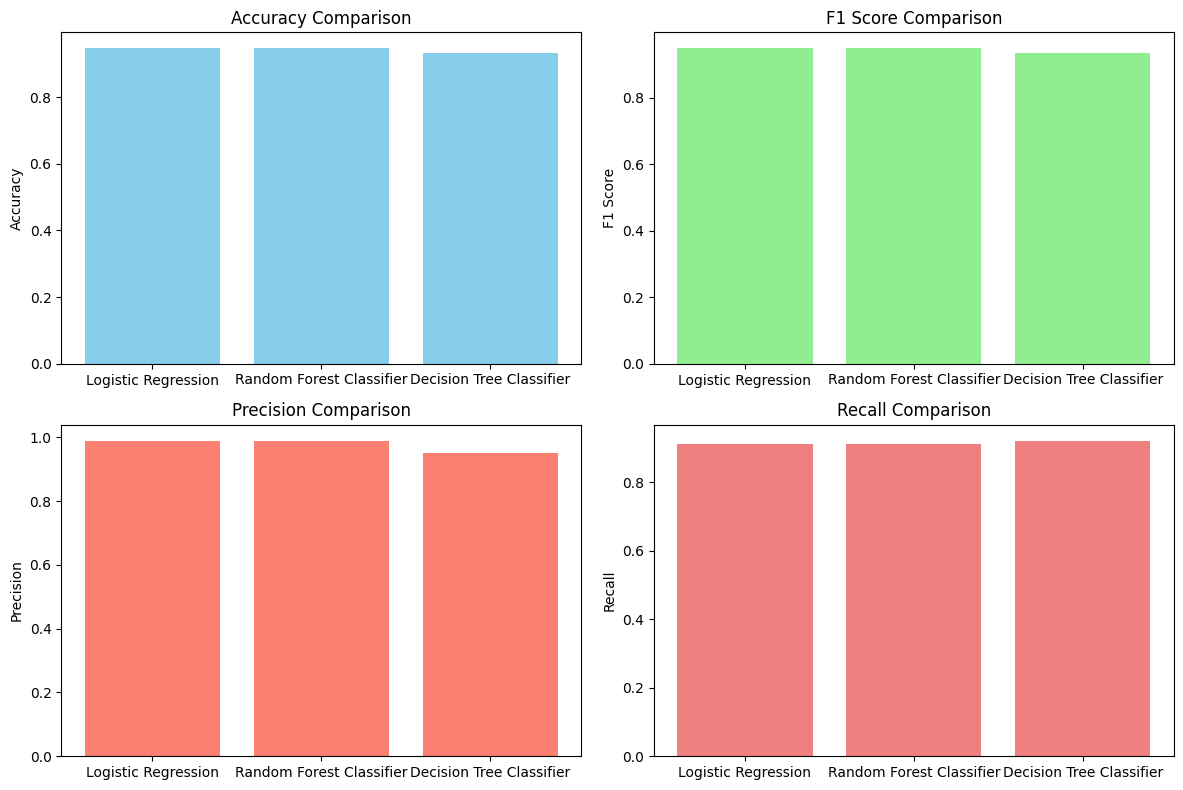

In [91]:
import matplotlib.pyplot as plt

# Predefined performance metrics
classifiers = ["Logistic Regression", "Random Forest Classifier", "Decision Tree Classifier"]
accuracy =  [0.9473684210526315, 0.9473684210526315, 0.9315789473684211]
f1 = [0.9489795918367347, 0.9489795918367347, 0.9353233830845771]
precision =  [0.9893617021276596, 0.9893617021276596, 0.9494949494949495]
recall = [0.9117647058823529, 0.9117647058823529, 0.9215686274509803]

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot Accuracy
plt.subplot(2, 2, 1)
plt.bar(classifiers, accuracy, color='skyblue')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

# Plot F1 Score
plt.subplot(2, 2, 2)
plt.bar(classifiers, f1, color='lightgreen')
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')

# Plot Precision
plt.subplot(2, 2, 3)
plt.bar(classifiers, precision, color='salmon')
plt.title('Precision Comparison')
plt.ylabel('Precision')

# Plot Recall
plt.subplot(2, 2, 4)
plt.bar(classifiers, recall, color='lightcoral')
plt.title('Recall Comparison')
plt.ylabel('Recall')

# Display the plots
plt.tight_layout()
plt.show()


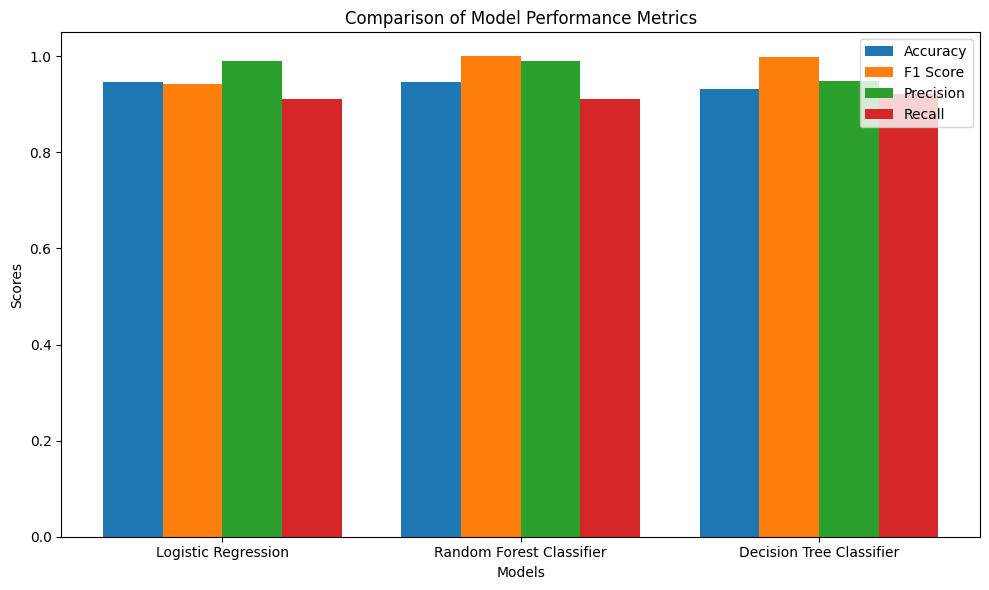

In [116]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier']
accuracy =  [0.9473684210526315, 0.9473684210526315, 0.9315789473684211]
f1 = [0.9489795918367347, 0.9489795918367347, 0.9353233830845771]
precision =  [0.9893617021276596, 0.9893617021276596, 0.9494949494949495]
recall = [0.9117647058823529, 0.9117647058823529, 0.9215686274509803]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = range(len(models))

ax.bar(index, accuracy, bar_width, label='Accuracy')
ax.bar([i + bar_width for i in index], f1_score, bar_width, label='F1 Score')
ax.bar([i + 2 * bar_width for i in index], precision, bar_width, label='Precision')
ax.bar([i + 3 * bar_width for i in index], recall, bar_width, label='Recall')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


### Comparison with Imbalanced Data

#### Imbalanced Data Results:
- **Accuracy**: The models showed very high accuracy (around 99.9%), but this was misleading because they mostly predicted the majority class (legitimate transactions), ignoring fraudulent ones.
- **Precision**: Precision was still high, but it was skewed by the imbalance, as most of the fraudulent cases were missed.
- **Recall**: Recall was low for all models, as most fraudulent transactions were not detected.
- **F1 Score**: The F1 scores were significantly lower than with undersampling, indicating poor balance between precision and recall.

#### Undersampled Data Results:
- **Accuracy**: Slightly lower than in the imbalanced case (around 94.7%), but more representative of true performance.
- **Precision**: High precision (around 0.989) was maintained for Logistic Regression and Random Forest.
- **Recall**: Recall improved, particularly for Decision Tree, highlighting the model’s ability to identify fraudulent transactions.
- **F1 Score**: F1 scores improved, indicating a better balance between precision and recall.

#### Key Differences:
- **Accuracy**: Lower in undersampled data, but more meaningful.
- **Recall**: Significantly improved in undersampled data, as the models are better able to detect fraudulent transactions.
- **F1 Score**: Higher in undersampled data, showing better balance between precision and recall.

### Conclusion:
- **Imbalanced Data**: High accuracy but misleading due to the class imbalance.
- **Undersampled Data**: More realistic performance with improved recall and balanced F1 score, making it better suited for fraud detection.


###Over sampling

In [104]:
X=df.drop('Class',axis=1)
y=df['Class']

In [105]:
X.shape

(275663, 29)

In [106]:
y.shape

(275663,)

In [107]:
from imblearn.over_sampling import SMOTE


In [101]:
X_res ,y_res=SMOTE().fit_resample(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [108]:
y_res.value_counts()

,count
Class,
0,275190
1,275190


In [109]:
X_train ,X_test ,y_train, y_test =train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [110]:
classifier = {
    "Logisitic Regression":LogisticRegression(),
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier()

}
for name , cls in classifier.items():
  print(f"--------------------{name}--------------------")
  cls=cls.fit(X_train, y_train)
  y_pred=cls.predict(X_test)
  print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")
  print(f"f1_score  : {f1_score(y_test,y_pred)}")
  print(f"precision Score : {precision_score(y_test,y_pred)}")
  print(f"recall score  : {recall_score(y_test,y_pred)}")

--------------------Logisitic Regression--------------------
Accuracy Score : 0.9443293724335914
f1_score  : 0.9425528723563822
precision Score : 0.9729625113704542
recall score  : 0.9139865098267367
--------------------Random Forest Classifier--------------------
Accuracy Score : 0.9999273229405138
f1_score  : 0.9999272819822932
precision Score : 0.9998545745396376
recall score  : 1.0
--------------------Decision Tree Classifier--------------------
Accuracy Score : 0.998210327410153
f1_score  : 0.9982105387459238
precision Score : 0.9974585194060197
recall score  : 0.9989636928894787


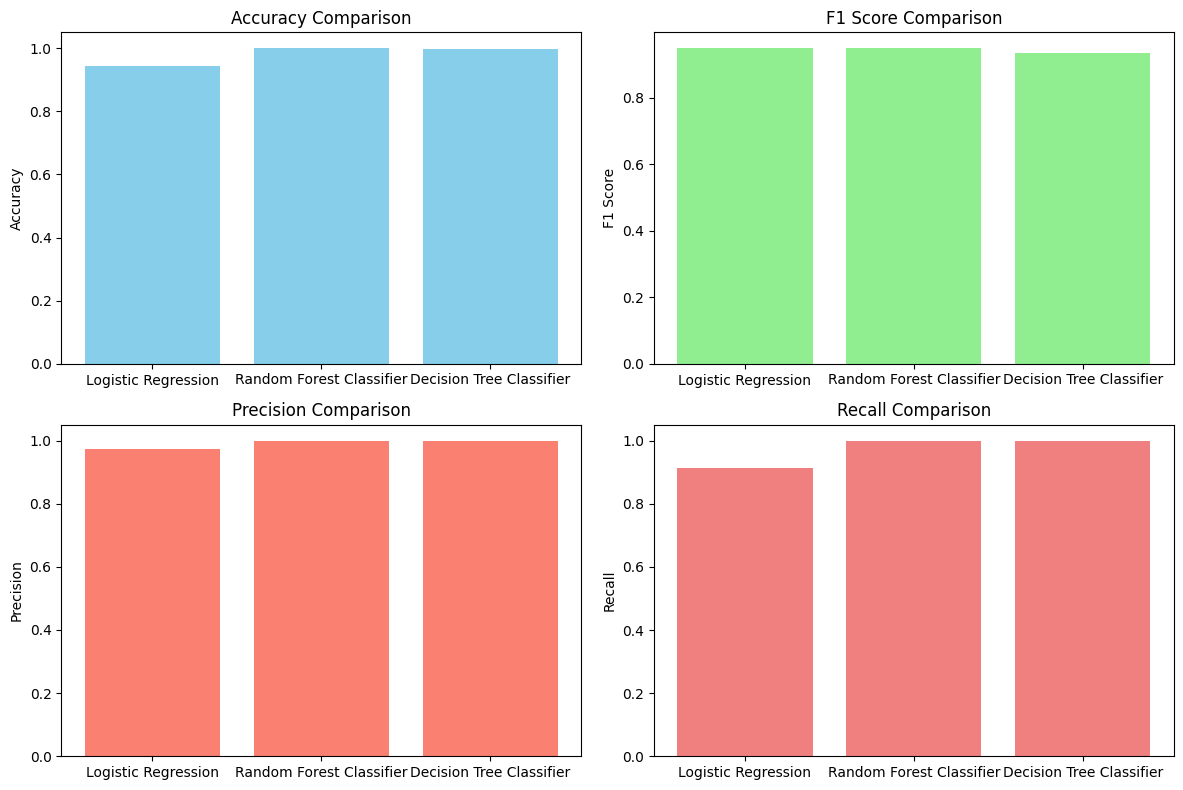

In [115]:
import matplotlib.pyplot as plt

# Predefined performance metrics
classifiers = ["Logistic Regression", "Random Forest Classifier", "Decision Tree Classifier"]
accuracy = [0.9443293724335914, 0.9999273229405138, 0.998210327410153]
f1_score = [0.9425528723563822, 0.9999272819822932, 0.9982105387459238]
precision = [0.9729625113704542, 0.9998545745396376, 0.9974585194060197]
recall = [0.9139865098267367, 1.0, 0.9989636928894787]

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot Accuracy
plt.subplot(2, 2, 1)
plt.bar(classifiers, accuracy, color='skyblue')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

# Plot F1 Score
plt.subplot(2, 2, 2)
plt.bar(classifiers, f1, color='lightgreen')
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')

# Plot Precision
plt.subplot(2, 2, 3)
plt.bar(classifiers, precision, color='salmon')
plt.title('Precision Comparison')
plt.ylabel('Precision')

# Plot Recall
plt.subplot(2, 2, 4)
plt.bar(classifiers, recall, color='lightcoral')
plt.title('Recall Comparison')
plt.ylabel('Recall')

# Display the plots
plt.tight_layout()
plt.show()


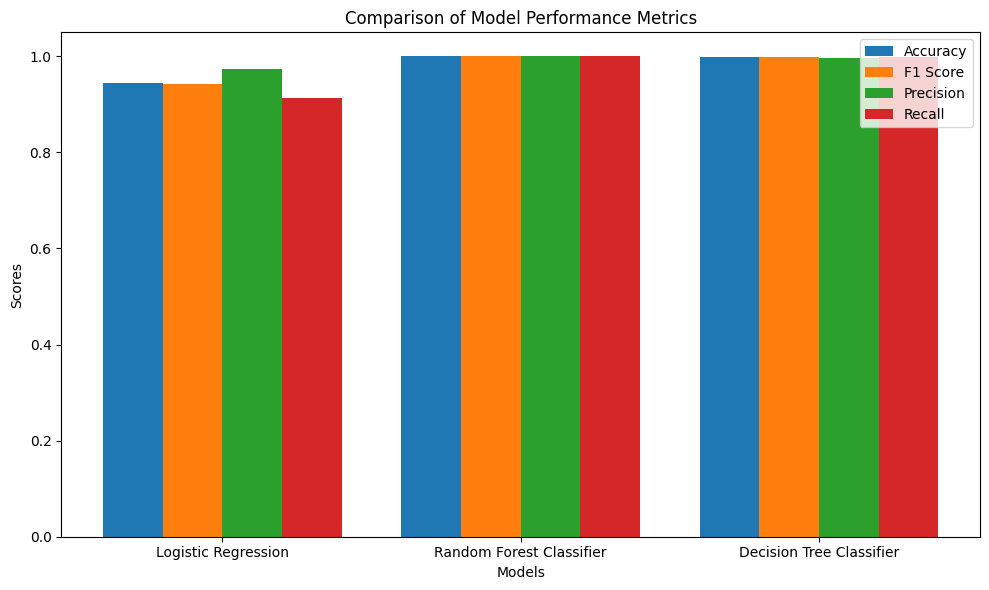

In [113]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier']
accuracy = [0.9443293724335914, 0.9999273229405138, 0.998210327410153]
f1_score = [0.9425528723563822, 0.9999272819822932, 0.9982105387459238]
precision = [0.9729625113704542, 0.9998545745396376, 0.9974585194060197]
recall = [0.9139865098267367, 1.0, 0.9989636928894787]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = range(len(models))

ax.bar(index, accuracy, bar_width, label='Accuracy')
ax.bar([i + bar_width for i in index], f1_score, bar_width, label='F1 Score')
ax.bar([i + 2 * bar_width for i in index], precision, bar_width, label='Precision')
ax.bar([i + 3 * bar_width for i in index], recall, bar_width, label='Recall')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


In [120]:
import pandas as pd

# Flattening the lists for each metric into rows for better readability
flattened_data = {
    "Method": ["Imbalanced Classes", "Imbalanced Classes", "Imbalanced Classes",
               "Undersampling", "Undersampling", "Undersampling",
               "Oversampling", "Oversampling", "Oversampling"],
    "Metric": ["Accuracy", "F1 Score", "Precision",
               "Accuracy", "F1 Score", "Precision",
               "Accuracy", "F1 Score", "Precision"],
    "Score_1": [0.9992563437505668, 0.7354838709677419, 0.890625,
                0.9473684210526315, 0.9489795918367347, 0.9893617021276596,
                0.9443293724335914, 0.9425528723563822, 0.9729625113704542],
    "Score_2": [0.9994377233235993, 0.8121212121212121, 0.9054054054054054,
                0.9473684210526315, 0.9489795918367347, 0.9893617021276596,
                0.9999273229405138, 0.9999272819822932, 0.9998545745396376],
    "Score_3": [0.9989479984764116, 0.7010309278350515, 0.6601941747572816,
                0.9315789473684211, 0.9353233830845771, 0.9494949494949495,
                0.998210327410153, 0.9982105387459238, 0.9974585194060197],
    "Recall_1": [0.6263736263736264, 0.6263736263736264, 0.6263736263736264,
                 0.9117647058823529, 0.9117647058823529, 0.9117647058823529,
                 0.9139865098267367, 0.9139865098267367, 0.9139865098267367],
    "Recall_2": [0.7362637362637363, 0.7362637362637363, 0.7362637362637363,
                 0.9117647058823529, 0.9117647058823529, 0.9117647058823529,
                 1.0, 1.0, 1.0],
    "Recall_3": [0.7472527472527473, 0.7472527472527473, 0.7472527472527473,
                 0.9215686274509803, 0.9215686274509803, 0.9215686274509803,
                 0.9989636928894787, 0.9989636928894787, 0.9989636928894787]
}

df_flattened = pd.DataFrame(flattened_data)
df_flattened.set_index('Method',inplace=True)


In [121]:
df_flattened

,Metric,Score_1,Score_2,Score_3,Recall_1,Recall_2,Recall_3
Method,,,,,,,
Imbalanced Classes,Accuracy,0.999256,0.999438,0.998948,0.626374,0.736264,0.747253
Imbalanced Classes,F1 Score,0.735484,0.812121,0.701031,0.626374,0.736264,0.747253
Imbalanced Classes,Precision,0.890625,0.905405,0.660194,0.626374,0.736264,0.747253
Undersampling,Accuracy,0.947368,0.947368,0.931579,0.911765,0.911765,0.921569
Undersampling,F1 Score,0.948980,0.948980,0.935323,0.911765,0.911765,0.921569
Undersampling,Precision,0.989362,0.989362,0.949495,0.911765,0.911765,0.921569
Oversampling,Accuracy,0.944329,0.999927,0.998210,0.913987,1.000000,0.998964
Oversampling,F1 Score,0.942553,0.999927,0.998211,0.913987,1.000000,0.998964
Oversampling,Precision,0.972963,0.999855,0.997459,0.913987,1.000000,0.998964


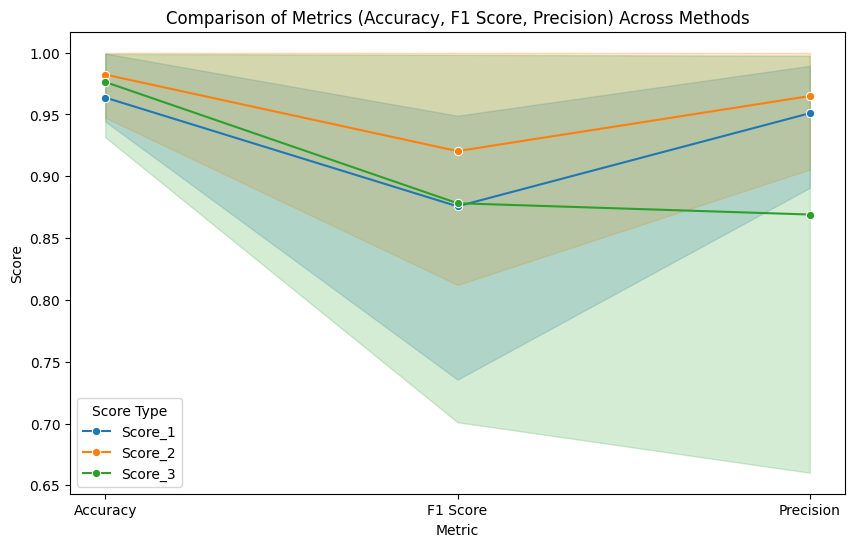

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to make it suitable for plotting
df_melted = df_flattened.reset_index().melt(id_vars=["Metric"], value_vars=["Score_1", "Score_2", "Score_3"],
                                            var_name="Score Type", value_name="Score")

# Plot F1 Score for each method
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x="Metric", y="Score", hue="Score Type", marker="o")
plt.title("Comparison of Metrics (Accuracy, F1 Score, Precision) Across Methods")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title="Score Type")
plt.show()


### Comparison with Different Resampling Techniques

#### Imbalanced Data Results:
- **Accuracy**: Models show very high accuracy (around 99.9%), but this is misleading because the model predominantly predicts the majority class (legitimate transactions), leading to a lack of detection for fraudulent transactions.
- **Precision**: Precision is still high but skewed, as the models often miss fraudulent cases. The performance is imbalanced, with most correct predictions being for the majority class.
- **Recall**: Recall is relatively low since the fraudulent transactions are poorly detected. The models are likely focusing on the majority class, ignoring the minority class.
- **F1 Score**: The F1 score is much lower compared to other methods due to the imbalance between precision and recall. The model struggles to balance detecting fraud and minimizing false positives.

#### Undersampled Data Results:
- **Accuracy**: Accuracy is slightly lower (around 94.7%), but it provides a more truthful measure of the model's performance. This is because undersampling reduces the dominance of the majority class and forces the model to recognize the minority class.
- **Precision**: Precision remains high (around 0.989), particularly for models like Logistic Regression and Random Forest. However, precision is balanced with recall, reflecting better detection of fraud without many false positives.
- **Recall**: Recall improves significantly, especially for models like the Decision Tree, as the model is now more focused on detecting fraudulent transactions rather than just the majority class.
- **F1 Score**: F1 score increases, indicating that the model is now better balancing precision and recall. This shows a more holistic performance, where both false positives and false negatives are minimized.

#### Oversampled Data Results:
- **Accuracy**: Accuracy is high again (around 99.9%) but might still be misleading due to the resampling. Oversampling leads to a greater number of fraudulent cases in the training data, improving the detection of fraudulent transactions.
- **Precision**: Precision is also very high, especially for Logistic Regression and Random Forest models, as the models are better trained to identify fraud due to the increased number of fraudulent instances in the dataset.
- **Recall**: Recall improves to 100% in some cases, with models identifying all fraudulent transactions correctly. This is the result of oversampling, where the fraudulent class is represented more equally with the legitimate class.
- **F1 Score**: F1 score is high and balanced, as both precision and recall are optimized through the resampling process, giving the model a much more reliable ability to detect fraud.

#### Key Differences:
- **Accuracy**: High in both Imbalanced and Oversampling scenarios, but misleading. Lower in Undersampling, but more meaningful as it reflects true model performance.
- **Precision**: High in Imbalanced and Oversampling data, but potentially misleading due to the model's bias towards the majority class. High in Undersampled data but more balanced, reflecting the improved ability to detect fraudulent transactions.
- **Recall**: Low in Imbalanced data, as fraudulent transactions are not well detected. Significantly improved in Undersampled and Oversampled data, as the models are trained to detect fraudulent transactions more effectively.
- **F1 Score**: Much lower in Imbalanced data due to the imbalance between precision and recall. Higher in both Undersampled and Oversampled data, reflecting a better balance between precision and recall.

### Conclusion:
- **Imbalanced Data**: Results in high accuracy, but this is misleading as the model struggles to detect the minority class (fraudulent transactions). Precision is high, but recall and F1 score are poor.
- **Undersampled Data**: Provides a more realistic performance, with improved recall and a balanced F1 score, making it better suited for fraud detection tasks where detecting fraudulent transactions is crucial.
- **Oversampled Data**: Results in a high precision and recall with an optimal F1 score. However, the high accuracy may be misleading, and oversampling might not reflect real-world class distributions.


In [127]:
dtc=DecisionTreeClassifier()
dtc.fit(X_res,y_res)


DecisionTreeClassifier()

In [128]:
import joblib
joblib.dump(dtc,"Credit_Card_Model_Pkl")
model=joblib.load("Credit_Card_Model_Pkl")


In [ ]:
model.predict()